In [622]:
library(Seurat)

In [ ]:
sc.T1 <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T1/sc.all.merge.rds')
sc.T1@meta.data$time <- 'T1'
sc.T1@meta.data$orig.ident <- substr(rownames(sc.T1@meta.data),1,8)

sc.T2 <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T2/sc.all.merge.rds')
sc.T2@meta.data$time <- 'T2'
sc.T2@meta.data$orig.ident <- substr(rownames(sc.T2@meta.data),1,8)

sc.T3 <- readRDS('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/T3/sc.all.merge.rds')
sc.T3@meta.data$time <- 'T3'
sc.T3@meta.data$orig.ident <- substr(rownames(sc.T3@meta.data),1,8)

In [ ]:
sc.all.merge <- merge(sc.T1,y = list(sc.T2,sc.T3), add.cell.ids = c('T1','T2','T3'), project = "EP_mouse")

In [ ]:
sc.all.merge <- JoinLayers(sc.all.merge)
sc.all.merge[["RNA"]] <- split(sc.all.merge[["RNA"]], f = sc.all.merge$orig.ident)

In [ ]:
sc.all.merge

In [92]:
sc.all.merge <- NormalizeData(sc.all.merge)
sc.all.merge <- FindVariableFeatures(sc.all.merge, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(sc.all.merge)
sc.all.merge <- ScaleData(sc.all.merge, features = all.genes)
sc.all.merge <- RunPCA(sc.all.merge, features = VariableFeatures(object = sc.all.merge))
sc.all.merge <- RunUMAP(sc.all.merge, dims = 1:30)

Normalizing layer: counts.T1_a3026

Normalizing layer: counts.T1_a3028

Normalizing layer: counts.T1_a3030

Normalizing layer: counts.T2_a3026

Normalizing layer: counts.T2_a3028

Normalizing layer: counts.T2_a3030

Normalizing layer: counts.T3_a3026

Normalizing layer: counts.T3_a3028

Normalizing layer: counts.T3_a3030

Finding variable features for layer counts.T1_a3026

Finding variable features for layer counts.T1_a3028

Finding variable features for layer counts.T1_a3030

Finding variable features for layer counts.T2_a3026

Finding variable features for layer counts.T2_a3028

Finding variable features for layer counts.T2_a3030

Finding variable features for layer counts.T3_a3026

Finding variable features for layer counts.T3_a3028

Finding variable features for layer counts.T3_a3030

Centering and scaling data matrix

PC_ 1 
Positive:  Pclaf, Top2a, Birc5, H2afz, Smc2, Tk1, Cks1b, Mki67, Ccna2, Hmgb1 
	   Spc24, Diaph3, Tyms, Cdk1, Hmgb2, Dek, Ranbp1, Kif15, Racgap1, Hist1h1e 
	 

In [93]:
sc.all.merge <- FindNeighbors(sc.all.merge, dims = 1:30, reduction = "pca")
sc.all.merge <- FindClusters(sc.all.merge, resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 92018
Number of edges: 2576118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9056
Number of communities: 12
Elapsed time: 45 seconds


1 singletons identified. 11 final clusters.



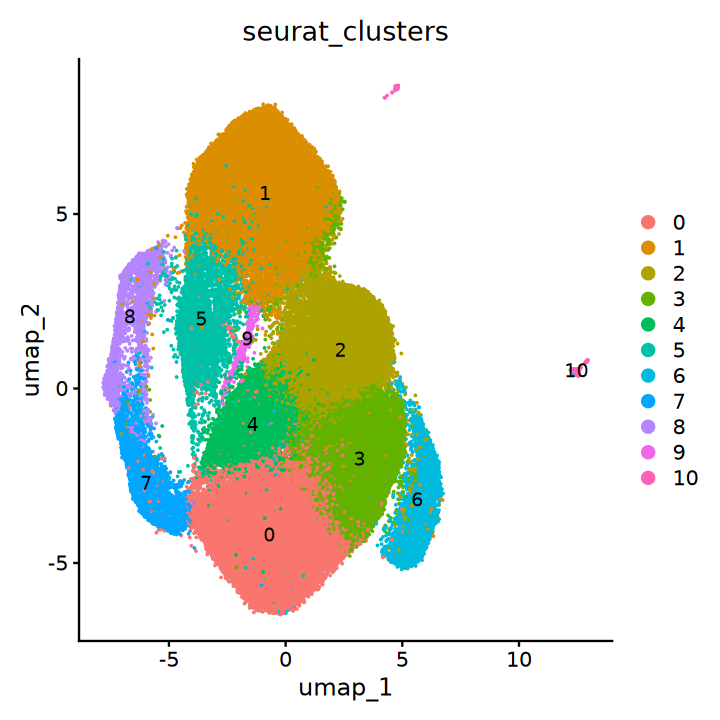

In [94]:
options(repr.plot.width = 6, repr.plot.height = 6) 
DimPlot(sc.all.merge, group.by = 'seurat_clusters',raster=FALSE,label = T)

In [95]:
sc.all.merge

An object of class Seurat 
32285 features across 92018 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 2 dimensional reductions calculated: pca, umap

In [96]:
sc.all.merge <- IntegrateLayers(object = sc.all.merge, method = HarmonyIntegration,orig.reduction = "pca",new.reduction = "harmony", verbose = F)

Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

In [97]:
sc.all.merge <- RunUMAP(sc.all.merge, dims = 1:40,reduction= "harmony",reduction.name = "umap.harmony" )

21:27:38 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

21:27:38 Read 92018 rows and found 40 numeric columns

21:27:38 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

21:27:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:27:49 Writing NN index file to temp file /tmp/RtmpjVSSTR/filebd65771e84bf

21:27:49 Searching Annoy index using 1 thread, search_k = 3000

21:28:45 Annoy recall = 100%

21:28:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:28:58 Initializing from normalized Laplacian + 

In [3]:
library(Seurat)
help(FindClusters)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [100]:
sc.all.merge <- FindNeighbors(sc.all.merge, reduction = "harmony", dims = 1:40)
sc.all.merge <- FindClusters(sc.all.merge, resolution = 0.15, cluster.name = "harmony_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 92018
Number of edges: 2633047

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9263
Number of communities: 10
Elapsed time: 42 seconds


2 singletons identified. 8 final clusters.



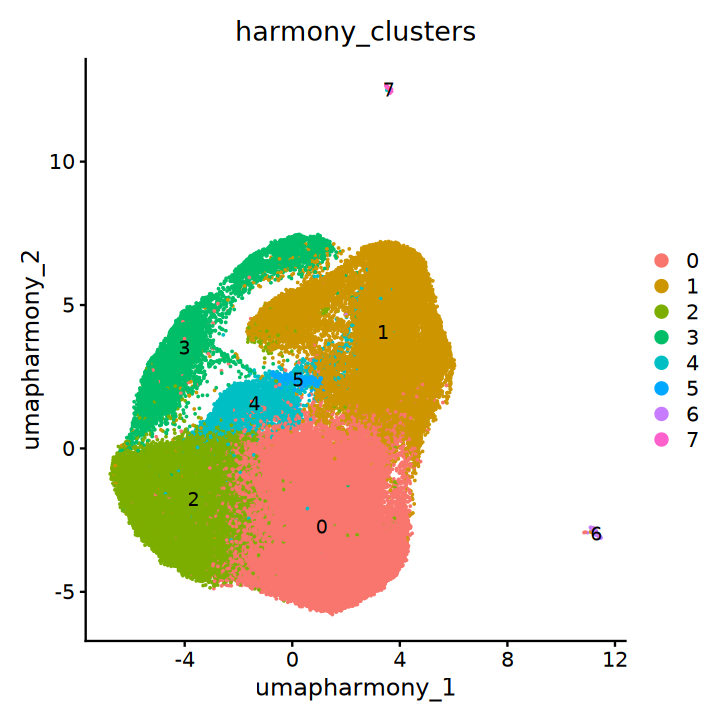

In [104]:
options(repr.plot.width = 6, repr.plot.height = 6) 
DimPlot(sc.all.merge, reduction = "umap.harmony",group.by = 'harmony_clusters',raster=FALSE,label = T#,
       #cols = c('#a6cee3','#33a02c','#6a3d9a','#fb9a99','#e31a1c','#ff7f00','#fdbf6f','#cab2d6','gray','black')
       )

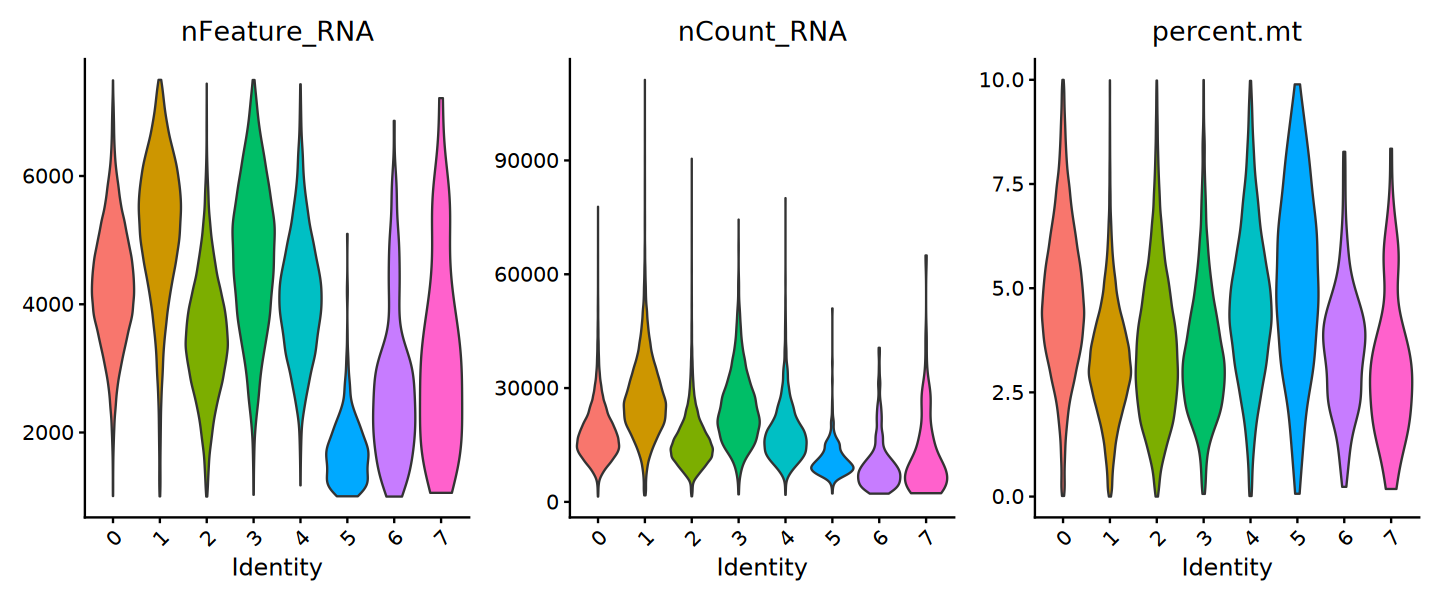

In [106]:
options(repr.plot.width = 12, repr.plot.height = 5) 
VlnPlot(sc.all.merge, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size=0)

In [107]:
sc.all.merge <- subset(sc.all.merge,seurat_clusters %in% c(0,1,2,3,4))

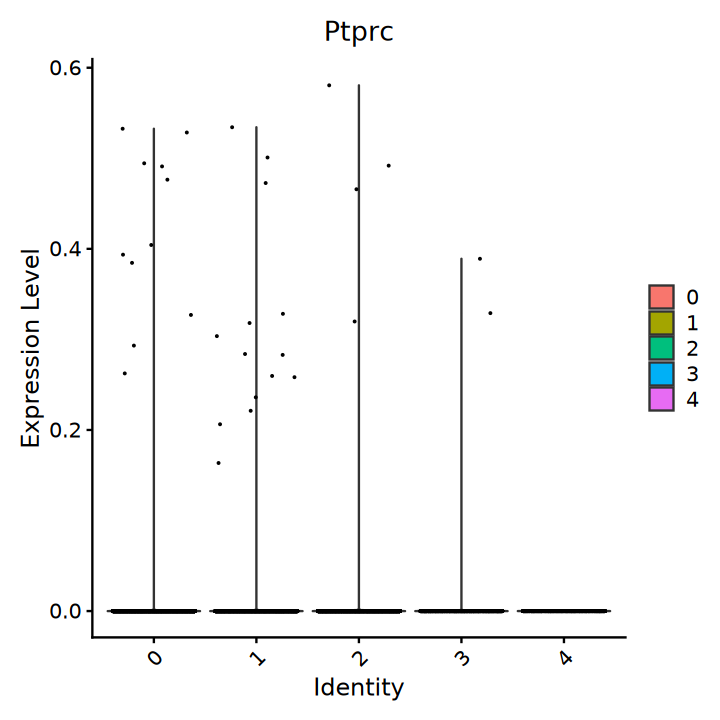

In [108]:
options(repr.plot.width = 6, repr.plot.height = 6) 
VlnPlot(sc.all.merge,features = 'Ptprc')

In [109]:
sc.all.merge

An object of class Seurat 
32285 features across 91422 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [110]:
sc.all.merge@meta.data$seurat_clusters_rename <- as.character(sc.all.merge@meta.data$harmony_clusters)
sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_rename == 2,'seurat_clusters_rename'] <- 9
sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_rename == 0,'seurat_clusters_rename'] <- 2
sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_rename == 9,'seurat_clusters_rename'] <- 0

In [111]:
library(ggplot2)

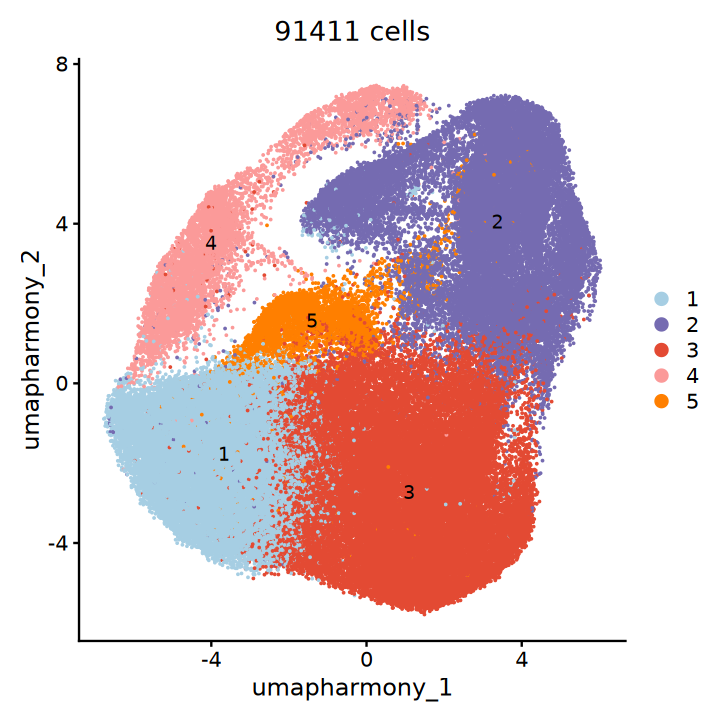

In [131]:
options(repr.plot.width = 6, repr.plot.height = 6)
DimPlot(sc.all.merge, reduction = "umap.harmony",group.by = 'seurat_clusters_rename',raster=FALSE,label = T,
       cols = c('#a6cee3','#756bb1','#e34a33','#fb9a99','#ff7f00')
       )+ ggtitle(paste0(dim(sc.all.merge)[2],' cells'))

In [113]:
sc.all.merge

An object of class Seurat 
32285 features across 91422 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [114]:
sc.all.merge@meta.data$seurat_clusters_rename <- as.character(as.numeric(sc.all.merge@meta.data$seurat_clusters_rename)+1)

In [115]:
unique(sc.all.merge@meta.data$seurat_clusters_rename)

[1] "2" "1" "3" "4" "5"

In [117]:
sc.all.merge@meta.data <- cbind(sc.all.merge@meta.data,
                      as.data.frame(sc.all.merge@reductions$umap.harmony@cell.embeddings)[rownames(sc.all.merge@meta.data),])

In [118]:
sc.all.merge <- subset(sc.all.merge,cells = rownames(sc.all.merge@meta.data)[sc.all.merge@meta.data$umapharmony_1 < 8 & sc.all.merge@meta.data$umapharmony_2 < 10])

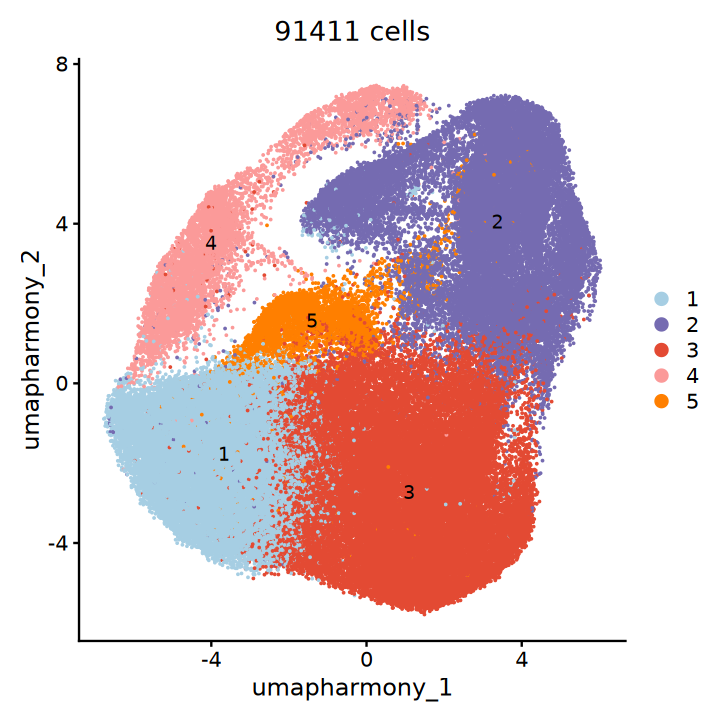

In [132]:
options(repr.plot.width = 6, repr.plot.height = 6)
DimPlot(sc.all.merge, reduction = "umap.harmony",group.by = 'seurat_clusters_rename',raster=FALSE,label = T,
       cols = c('#a6cee3','#756bb1','#e34a33','#fb9a99','#ff7f00')
       )+ ggtitle(paste0(dim(sc.all.merge)[2],' cells'))

In [120]:
table(sc.all.merge@meta.data$seurat_clusters_rename)


    1     2     3     4     5 
23463 25185 32470  6190  4103 

In [121]:
saveRDS(sc.all.merge,file='sc.all.merge.T1T2T3a.harmony.final.refine.rds')

In [122]:
sc.all.merge

An object of class Seurat 
32285 features across 91411 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [20]:
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO301','orig.ident'] <- 'T2_a3026_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO302','orig.ident'] <- 'T2_a3026_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO303','orig.ident'] <- 'T2_a3028_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO304','orig.ident'] <- 'T2_a3028_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO305','orig.ident'] <- 'T2_a3030_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T2' & sc.all.merge@meta.data$Assignment_0.7=='CMO306','orig.ident'] <- 'T2_a3030_2'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO301','orig.ident'] <- 'T3_a3026_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO307','orig.ident'] <- 'T3_a3026_2_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO303','orig.ident'] <- 'T3_a3028_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO304','orig.ident'] <- 'T3_a3028_2_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO305','orig.ident'] <- 'T3_a3030_1_1'
sc.all.merge@meta.data[sc.all.merge@meta.data$time=='T3' & sc.all.merge@meta.data$Assignment_0.7=='CMO306','orig.ident'] <- 'T3_a3030_2_1'

cellBCs <- c()
for (cellBC in rownames(sc.all.merge@meta.data)){
    cellBC <- substr(cellBC,nchar(cellBC)-1-16,nchar(cellBC)-2)
    cellBCs <- c(cellBCs,cellBC)
}

sc.all.merge@meta.data$cellName <- paste0(sc.all.merge@meta.data$orig.ident,'_',cellBCs)

In [124]:
write.table(sc.all.merge@meta.data,file='metadata.T1_T2_T3a.harmony.final.refine.csv',col.names = NA,quote=F,sep=',')

In [1]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sc.all.merge <- readRDS('sc.all.merge.T1T2T3a.harmony.final.refine.rds')

In [3]:
sc.all.merge

An object of class Seurat 
32285 features across 91411 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [5]:
table(sc.all.merge$time)


   T1    T2    T3 
34774 27081 29556 

In [458]:
library(ggplot2)

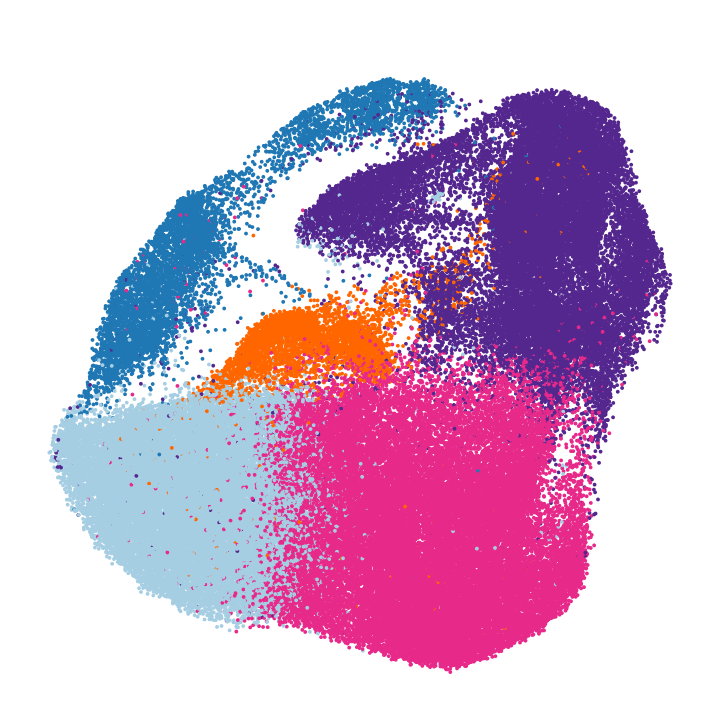

In [31]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot <- DimPlot(sc.all.merge, reduction = "umap.harmony",group.by = 'seurat_clusters_rename',raster=FALSE,label = T,label.size = 0,
       cols = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')
       )+ NoLegend()+ ggtitle('')+theme_bw()+#ggtitle(paste0(dim(sc.all.merge)[2],' cells'))
theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),axis.ticks.length = unit(0, "pt"),
           panel.border = element_blank(),axis.text = element_blank(),axis.title = element_blank())+ theme(legend.position = 'none')
plot
ggsave(plot,file='umap.png',height=6,width=6)

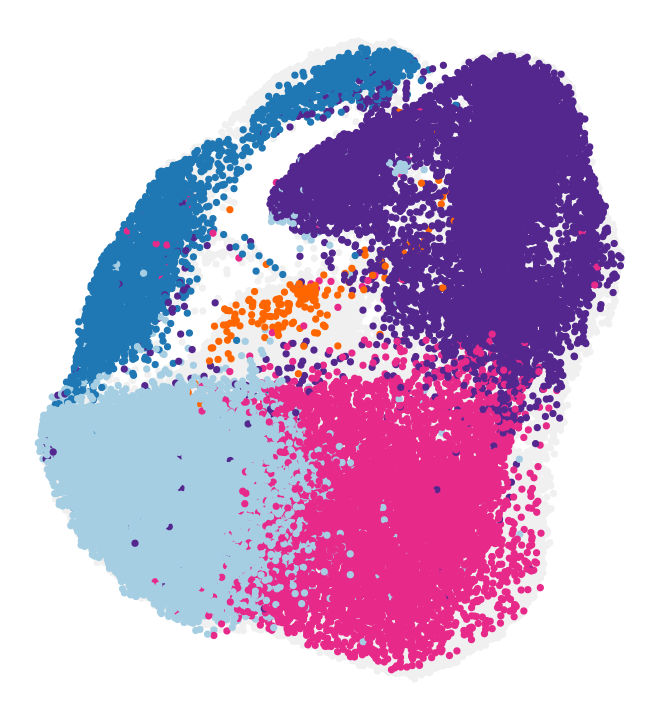

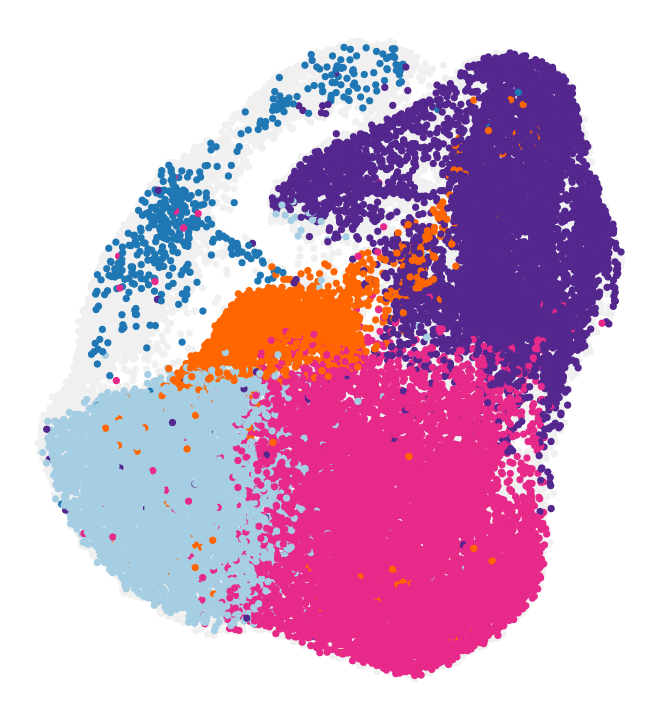

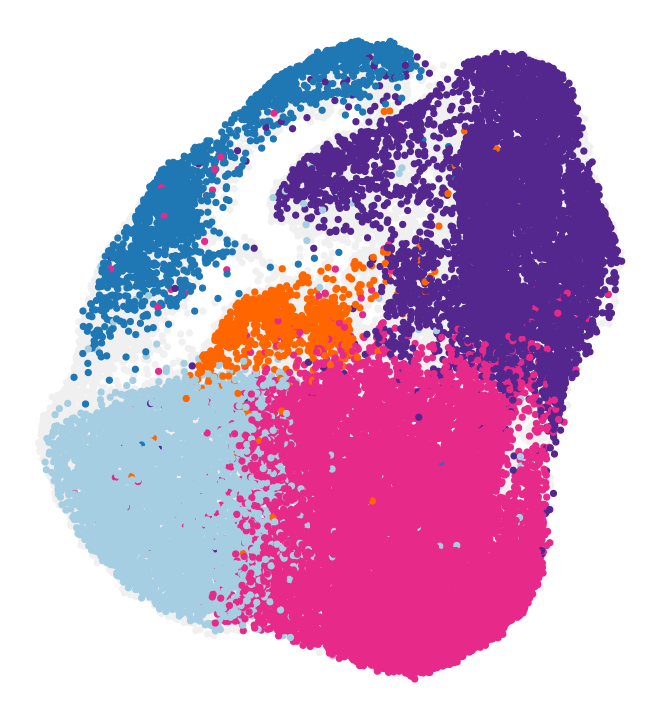

In [27]:
options(repr.plot.width = 5.5, repr.plot.height = 6)
#pdf(file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/umap_split_time.pdf',height=6,width=5.5)
for (time in c('T1','T2','T3')){
    sc.all.merge@meta.data$seurat_clusters_col <- as.character(sc.all.merge@meta.data$seurat_clusters_rename)
    sc.all.merge@meta.data[sc.all.merge@meta.data$time!=time,'seurat_clusters_col'] <- 'bg'
    sc.all.merge@meta.data$seurat_clusters_col <- factor(sc.all.merge@meta.data$seurat_clusters_col,
                                                         levels = c('bg','1','2','3','4','5'))
    plot <- ggplot()+
            geom_point(data =sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_col == 'bg',],aes(x=umapharmony_1,y=umapharmony_2),size=1,color='#f0f0f0') + 
            geom_point(data =sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_col != 'bg',],aes(x=umapharmony_1,y=umapharmony_2,color=seurat_clusters_col),size=1)+
            scale_color_manual(
                 breaks=c('1','2','3','4','5'),
                 values=c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')
         )+ theme_bw()+
     theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank(),axis.ticks.length = unit(0, "pt"),
           panel.border = element_blank(),axis.text = element_blank(),axis.title = element_blank())+ theme(legend.position = 'none')#+ 
        #ggtitle(paste0(time,'-',dim(sc.all.merge@meta.data[sc.all.merge@meta.data$seurat_clusters_col != 'bg',])[1],' cells'))

    print(plot) 
    ggsave(plot,file=paste0(time,'_umap.png'),height=6,width=6)
}
#dev.off()

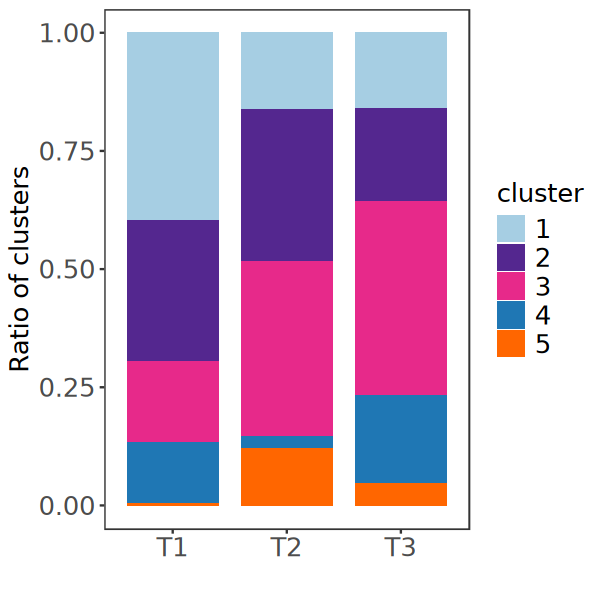

In [21]:
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 5)
sc.all.merge@meta.data$Num <- 1
plot <- ggplot(data=sc.all.merge@meta.data[sc.all.merge@meta.data$orig.ident %in% c('T1_a3026','T2_a3026_1','T2_a3026_2','T3_a3026_2_1','T3_a3026_1_1'),],aes(time,Num,fill=seurat_clusters_rename)) + geom_bar(stat="identity",position="fill",width=0.8) +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600'))+
    theme_bw() + theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),
                  legend.text=element_text(size=15),legend.title=element_text(size=15))
ggsave(plot,file='cluster_ratio_a3026.pdf',height=5,width=5)
plot

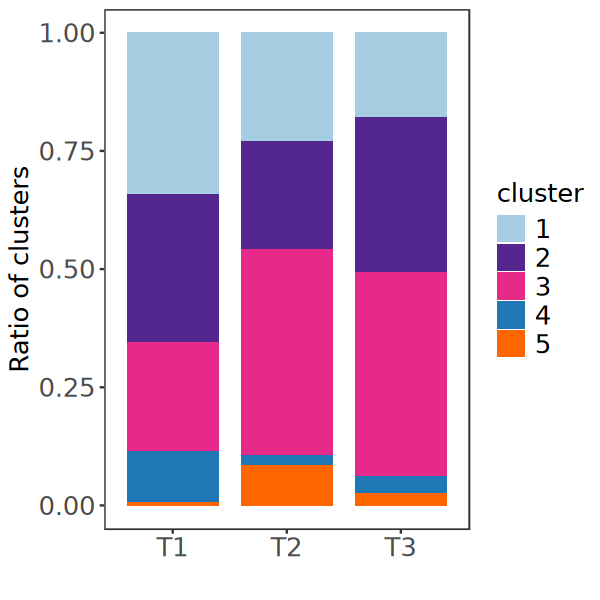

In [22]:
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 5)
sc.all.merge@meta.data$Num <- 1
plot <- ggplot(data=sc.all.merge@meta.data[sc.all.merge@meta.data$orig.ident %in% c('T1_a3028','T2_a3028_1','T2_a3028_2','T3_a3028_2_1','T3_a3028_1_1'),],aes(time,Num,fill=seurat_clusters_rename)) + geom_bar(stat="identity",position="fill",width=0.8) +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600'))+
    theme_bw() + theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),
                  legend.text=element_text(size=15),legend.title=element_text(size=15))
ggsave(plot,file='cluster_ratio_a3028.pdf',height=5,width=5)
plot

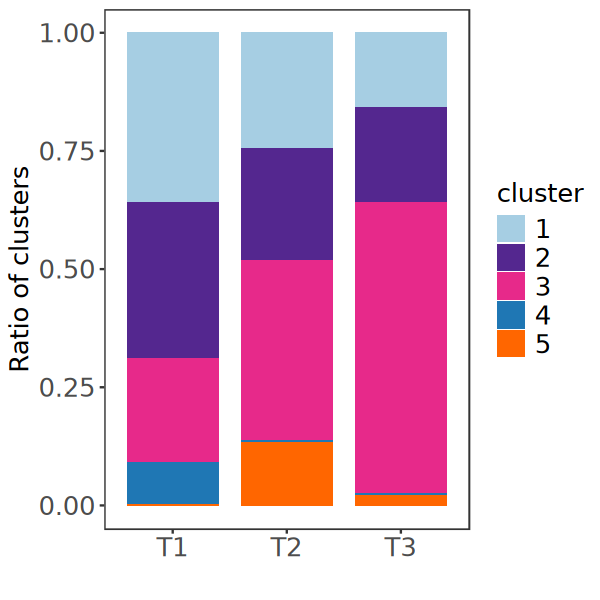

In [23]:
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 5)
sc.all.merge@meta.data$Num <- 1
plot <- ggplot(data=sc.all.merge@meta.data[sc.all.merge@meta.data$orig.ident %in% c('T1_a3030','T2_a3030_1','T2_a3030_2','T3_a3030_2_1','T3_a3030_1_1'),],aes(time,Num,fill=seurat_clusters_rename)) + geom_bar(stat="identity",position="fill",width=0.8) +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600'))+
    theme_bw() + theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),
                  legend.text=element_text(size=15),legend.title=element_text(size=15))
ggsave(plot,file='cluster_ratio_a3030.pdf',height=5,width=5)
plot

In [4]:
sc.all.merge

An object of class Seurat 
32285 features across 91411 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 19 layers present: counts.T1_a3026, counts.T1_a3028, counts.T1_a3030, counts.T2_a3026, counts.T2_a3028, counts.T2_a3030, counts.T3_a3026, counts.T3_a3028, counts.T3_a3030, scale.data, data.T1_a3026, data.T1_a3028, data.T1_a3030, data.T2_a3026, data.T2_a3028, data.T2_a3030, data.T3_a3026, data.T3_a3028, data.T3_a3030
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [482]:
sc.all.merge <- JoinLayers(sc.all.merge)

In [483]:
Idents(sc.all.merge) <- sc.all.merge@meta.data$seurat_clusters_rename

sc.all.merge.markers <- FindAllMarkers(sc.all.merge, only.pos = TRUE,min.pct = 0.1)

Calculating cluster 2

Calculating cluster 1

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [462]:
sc.all.merge.markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Pclaf,0,4.275370,0.897,0.129,0,2,Pclaf
Spc24,0,3.757732,0.773,0.103,0,2,Spc24
Tk1,0,3.679177,0.855,0.185,0,2,Tk1
Ccna2,0,4.155450,0.729,0.062,0,2,Ccna2
Mki67,0,4.063172,0.747,0.081,0,2,Mki67
Smc2,0,3.109348,0.862,0.198,0,2,Smc2
Ube2c,0,3.921812,0.812,0.155,0,2,Ube2c
Cdca8,0,3.268513,0.792,0.142,0,2,Cdca8
Racgap1,0,2.861734,0.822,0.173,0,2,Racgap1


In [463]:
sc.all.merge.markers.filter <- sc.all.merge.markers[sc.all.merge.markers$avg_log2FC>1 & sc.all.merge.markers$p_val_adj < 0.05,]
sc.all.merge.markers.filter

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Pclaf,0,4.275370,0.897,0.129,0,2,Pclaf
Spc24,0,3.757732,0.773,0.103,0,2,Spc24
Tk1,0,3.679177,0.855,0.185,0,2,Tk1
Ccna2,0,4.155450,0.729,0.062,0,2,Ccna2
Mki67,0,4.063172,0.747,0.081,0,2,Mki67
Smc2,0,3.109348,0.862,0.198,0,2,Smc2
Ube2c,0,3.921812,0.812,0.155,0,2,Ube2c
Cdca8,0,3.268513,0.792,0.142,0,2,Cdca8
Racgap1,0,2.861734,0.822,0.173,0,2,Racgap1


In [464]:
write.table(sc.all.merge.markers.filter,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/sc.all.merge.markers.csv',sep=',',col.names = T,row.names = T,quote=F)

In [461]:
library(dplyr)

In [60]:
sc.all.merge.markers[sc.all.merge.markers$avg_log2FC > 3 & sc.all.merge.markers$cluster=='4',]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Clu,0,3.772151,0.831,0.208,0,4,Clu
Cotl1,0,3.241725,0.438,0.074,0,4,Cotl1
Mab21l4,0,5.511148,0.356,0.012,0,4,Mab21l4
Maoa,0,3.759259,0.342,0.023,0,4,Maoa
Cd53,0,3.654123,0.333,0.038,0,4,Cd53
Igsf11,0,3.146116,0.316,0.040,0,4,Igsf11
Gm49504,0,5.428477,0.186,0.004,0,4,Gm49504
Krt23,0,3.212602,0.197,0.020,0,4,Krt23
Sox5,0,3.058896,0.275,0.100,0,4,Sox5


In [484]:
library(dplyr)
sc.all.merge.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 100) %>%
    ungroup() -> top100

In [485]:
write.table(top100,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cluster_DEGs_top100.csv',sep=',',col.names = T,row.names = T,quote=F)

In [20]:
top100

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,4.275370,0.897,0.129,0,2,Pclaf
0,3.757732,0.773,0.103,0,2,Spc24
0,3.679177,0.855,0.185,0,2,Tk1
0,4.155450,0.729,0.062,0,2,Ccna2
0,4.063172,0.747,0.081,0,2,Mki67
0,3.109348,0.862,0.198,0,2,Smc2
0,3.921812,0.812,0.155,0,2,Ube2c
0,3.268513,0.792,0.142,0,2,Cdca8
0,2.861734,0.822,0.173,0,2,Racgap1


In [16]:
sc.all.merge@meta.data$seurat_clusters_rename_time <- paste0(sc.all.merge@meta.data$seurat_clusters_rename,'_',sc.all.merge@meta.data$time)

In [21]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [4]:
library(RColorBrewer)

In [13]:
sc.all.merge@meta.data$time_cluster <- paste0(sc.all.merge@meta.data$time,'_',sc.all.merge@meta.data$seurat_clusters_rename)
sc.all.merge@meta.data$time_cluster <- factor(sc.all.merge@meta.data$time_cluster,
                                              levels = c('T1_1','T2_1','T3_1','T1_2','T2_2','T3_2',
                                                        'T1_3','T2_3','T3_3','T1_4','T2_4','T3_4','T1_5','T2_5','T3_5'))

In [ ]:
state_genes <- c('Hmox1','Bnip3','Rgcc','Spc24','Mki67','Smc2','Itgb5','Tgfbr2','Sparc','Clu','Riok2','Atg101','Gbp3','Isg15','Gbp2')
cluster.averages <- AggregateExpression(sc.all.merge,features = state_genes,
                                      group.by = 'seurat_clusters_rename_time',slot = 'data',return.seurat=TRUE) 
Idents(cluster.averages) <- colnames(cluster.averages)

png 
  2

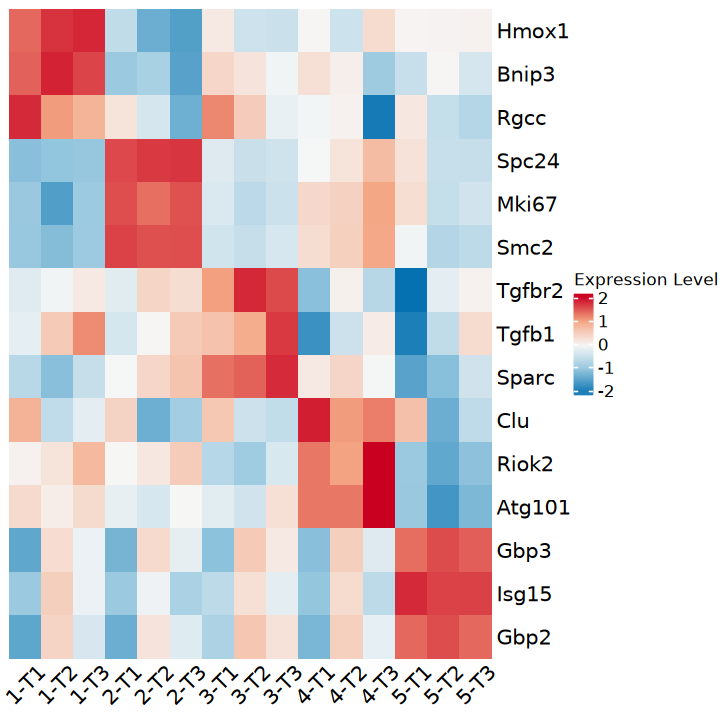

In [24]:
df <- as.matrix(cluster.averages@assays$RNA@layers$scale.data)
colnames(df) <- gsub('g','',colnames(cluster.averages))
rownames(df) <- rownames(cluster.averages)
df <- df[state_genes,]

library(RColorBrewer)
options(repr.plot.width = 6, repr.plot.height = 6)
pdf(file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/cluster_DEGs_heatmap_selected.pdf',height=7,width=7)
plot <- Heatmap(df,cluster_rows = F,cluster_columns = F,show_row_names = T,column_names_rot = 45,
        column_names_centered = T,heatmap_legend_param = list(title = "Expression Level"),
       col = colorRampPalette(rev(brewer.pal(n = 5, name = "RdBu")))(200))
print(plot)
dev.off()
plot